# Fiting Vela Data

Federico García and Satiango Del Palacio for PuMA Collaboration

Import libraries and plot options

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.lines as lines

In [2]:
data_A1_pre=np.loadtxt('preglitch_A1.dat',skiprows=1)
data_A1_pre=data_A1_pre.transpose()
data_A1_pre[0] = data_A1_pre[0]/86400
data_A1_pre[1]=data_A1_pre[0]/2+data_A1_pre[1]
data_A1_pre[2]=data_A1_pre[2]*1000 - 89402

data_A2_pre=np.loadtxt('preglitch_A2.dat',skiprows=1)
data_A2_pre=data_A2_pre.transpose()
data_A2_pre[0] = data_A2_pre[0]/86400
data_A2_pre[1]=data_A2_pre[0]/2+data_A2_pre[1]
data_A2_pre[2]=data_A2_pre[2]*1000 - 89402

data_A1=np.loadtxt('aust_A1.dat',skiprows=0)
data_A1=data_A1.transpose()
data_A1[0] = data_A1[0]/86400
data_A1[1]=data_A1[0]/2+data_A1[1]
data_A1[2]=data_A1[2]*1000 - 89402

data_A2=np.loadtxt('aust_A2.dat',skiprows=0)
data_A2=data_A2.transpose()
data_A2[0] = data_A2[0]/86400
data_A2[1]=data_A2[0]/2+data_A2[1]
data_A2[2]=data_A2[2]*1000 - 89402

In [3]:
def ephemeris_LAT(MJD):
    F0 = 11.190331009580613669 #11.190515403970546739
    F1 = -1.5575483023253953269e-11 #-1.5590725351333833792e-11
    P0 = 1 / F0 #0.089328385024
    P1 = - F1 * P0*P0 #1.25008E-13
    MJD0 = 54800# 54663 #51559.319
    P = P0 + P1 * (MJD - MJD0) * 86400
    return P*1000*1000 - 89402

def ephemeris_old(MJD):
    F0 = 11.190515403970546739
    F1 = -1.5590725351333833792e-11
    P0 = 1 / F0 #0.089328385024
    P1 = - F1 * P0*P0 #1.25008E-13
    MJD0 = 54663 #51559.319
    P = P0 + P1 * (MJD - MJD0) * 86400
    return P*1000*1000 - 89402

def ephemeris_LIGO(MJD):
    F0 = 22.3722
    F1 = -3.12e-11
    F2 = 1.16e-19
    P0 = 1 / F0 #0.089328385024
    P1 = - F1 * P0*P0 #1.25008E-13
    P2 = 2 * P1*P1 / P0 - F2 * P0*P0
    MJD0 = 58000 #51559.319
    P = P0 + P1 * (MJD - MJD0) * 86400 + P2 * (MJD - MJD0) * 86400 * (MJD - MJD0) * 86400 / 2
    return P*1000*1000 - 89402

def ephemeris_postglitch2017(MJD):
    F0 = 11.189397032852028835
    F1 =-1.5654746596974572345e-11
    P0 = 1 / F0 
    P1 = - F1 * P0*P0 
    MJD0 = 55555.00019243500558 
    P = P0 + P1 * (MJD - MJD0) * 86400
    return P*1000*1000 - 89402

def ephemeris_postglitch2019(MJD):
    F0 = 11.185424989387506652 #11.190515230459393291
    F1 = -1.5675722259450582869e-11 #-1.5590724867859280534e-11
    P0 = 1 / F0 
    P1 = - F1 * P0*P0 
    MJD0 = 58515 #55555.00019243500558 
    P = P0 + P1 * (MJD - MJD0) * 86400
    return P*1000*1000 - 89402

In [4]:
plt.close('all')

plt.rcParams['figure.figsize'] = (9,7)#(15,4)
plt.rcParams['legend.frameon'] = True
plt.rc('text', usetex=True)
plt.rc('font', family='serif', serif='cm20', size="20")

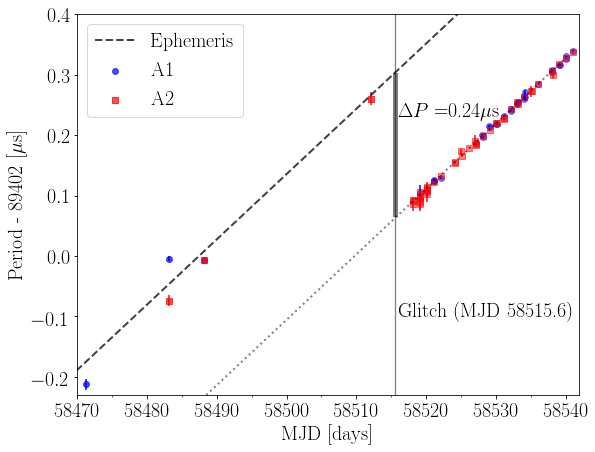

In [19]:
MJD = np.arange(58450, 58550, 10)
merr=1.5
ax = plt.axes()
# Pre-glitch data
ax.scatter(data_A1_pre[1],data_A1_pre[2],alpha=0.7,s=35,c='blue',label='A1')
ax.errorbar(data_A1_pre[1],data_A1_pre[2],xerr=data_A1_pre[0],yerr=merr*data_A1_pre[3]*1000,c='blue',linestyle="None")
ax.scatter(data_A2_pre[1],data_A2_pre[2],alpha=0.7,s=35,marker="s",c='red',label='A2')
ax.errorbar(data_A2_pre[1],data_A2_pre[2],xerr=data_A2_pre[0],yerr=merr*data_A2_pre[3]*1000,c='red',linestyle="None")
# Post-glitch data
ax.scatter(data_A1[1],data_A1[2],alpha=0.5,s=35,c='blue',label=None)
ax.errorbar(data_A1[1],data_A1[2],xerr=data_A1[0],yerr=merr*data_A1[3]*1000,c='blue',linestyle="None")
ax.scatter(data_A2[1],data_A2[2],alpha=0.5,s=35,marker="s",c='red',label=None)
ax.errorbar(data_A2[1],data_A2[2],xerr=data_A2[0],yerr=merr*data_A2[3]*1000,c='red', linestyle="None")
# Ephemeris and post-fit
ax.plot(MJD,ephemeris_postglitch2017(MJD),'k--',alpha=0.75,linewidth=2,label='Ephemeris')
ax.plot(MJD,ephemeris_postglitch2019(MJD),'k:',alpha=0.5,linewidth=2)
## Glitch line
ax.axvline(x=58515.6,alpha=0.5,c='black',linewidth=1.3)
ax.text(58516,-0.1,'Glitch (MJD 58515.6)')

x_glitch =58515.593
DP = ephemeris_postglitch2017(x_glitch)-ephemeris_postglitch2019(x_glitch)
DP_label = '$\Delta P=$' + str(round(DP,2)) + '$\mu$s'
ax.axvline(x=x_glitch, ymin=0.475, ymax=0.84, alpha=0.5,c='black',linewidth=5 , solid_capstyle='projecting')
ax.text(58516,0.23,DP_label)


## Labels and ticks
##plt.title('A1 - A2  period evolution')
ax.set_xlabel('MJD [days]')
ax.set_xlim(58470,58542)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.set_ylabel('Period - 89402 [$\mu$s]')
ax.set_ylim(-0.23,0.4)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))


# Show and save
plt.legend()
plt.savefig('Pglitch.pdf',bbox_inches='tight')
plt.show()

In [6]:
print(DP)


0.2408227500418434
